In [1]:
import re
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
tit_train = pd.read_csv('train.csv', header = 0)
tit_test = pd.read_csv('test.csv', header = 0)

In [192]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
tit_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
tit_train['female'] = np.where(tit_train['Sex']=='female', 1, 0)

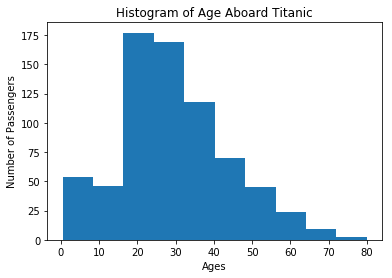

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel('Ages')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Age Aboard Titanic')
tit_train['Age'].hist(grid=False)

In [196]:
tit_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [197]:
tit_train['Age'].mode()

0    24.0
dtype: float64

In [198]:
sum(pd.isnull(tit_train['Age']))

177

In [265]:
ages = np.array(tit_train['Age'].dropna())

(array([ 14.,   6.,   7.,  37.,  36.,  16.,  30.,  20.,   1.,  10.]),
 array([  0.75 ,   6.575,  12.4  ,  18.225,  24.05 ,  29.875,  35.7  ,
         41.525,  47.35 ,  53.175,  59.   ]),
 <a list of 10 Patch objects>)

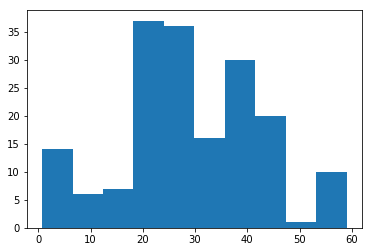

In [269]:
ages = np.random.choice(ages, size=177, replace=True,)
plt.hist(ages)

In [69]:
match = tit_train['SibSp'] + tit_train['Parch']
tit_train['Alone?'] = np.where(match > 0, 0, 1)


In [70]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,Emb,Alone,Alone?
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3,1,1


In [71]:
sum(tit_train['Alone?'])

537

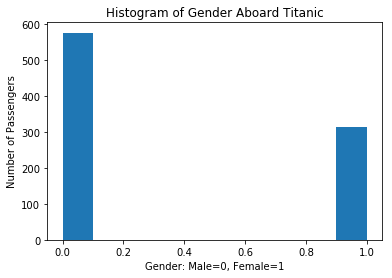

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel('Gender: Male=0, Female=1')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Gender Aboard Titanic')
tit_train['female'].hist(grid=False)

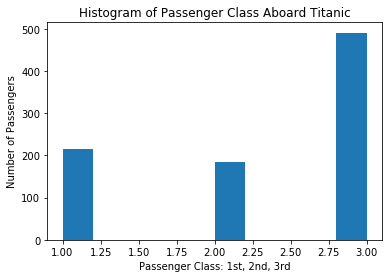

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel('Passenger Class: 1st, 2nd, 3rd')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Passenger Class Aboard Titanic')
tit_train['Pclass'].hist(grid=False)

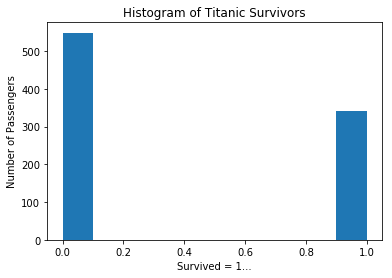

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('Survived = 1...')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Titanic Survivors')
tit_train['Survived'].hist(grid=False)

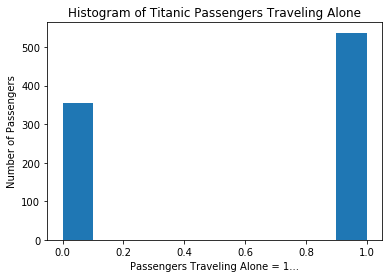

In [72]:
fig, ax = plt.subplots()
ax.set_xlabel('Passengers Traveling Alone = 1...')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Titanic Passengers Traveling Alone')
tit_train['Alone?'].hist(grid=False)

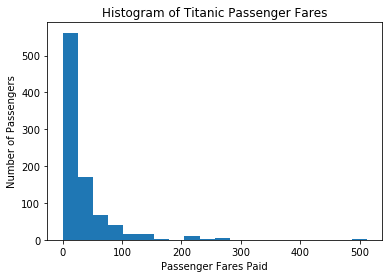

In [36]:
fig, ax = plt.subplots()
ax.set_xlabel("Passenger Fares Paid")
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Titanic Passenger Fares')
tit_train['Fare'].hist(bins=20, grid=False)

In [39]:
tit_train['Emb'] = np.where(tit_train['Embarked'] == 'C' ,1, np.where(tit_train['Embarked'] == 'Q',2, np.where(tit_train['Embarked'] == 'S', 3, 3))) 

In [209]:
tit_train['Emb'].describe()

count    891.000000
mean       2.536476
std        0.791503
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Emb, dtype: float64

In [211]:
tit_train['Emb'].mode()

0    3
dtype: int64

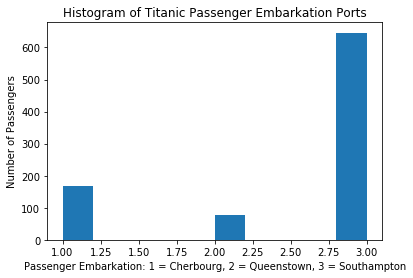

In [40]:
fig, ax = plt.subplots()
ax.set_xlabel('Passenger Embarkation: 1 = Cherbourg, 2 = Queenstown, 3 = Southampton')
ax.set_ylabel('Number of Passengers')
ax.set_title(r'Histogram of Titanic Passenger Embarkation Ports')
tit_train['Emb'].hist(grid=False)

In [66]:
tit_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'Emb',
       'Alone'],
      dtype='object')

In [67]:
tit_train2 = tit_train.drop(['Name', 'Sex','SibSp','Parch', 'Ticket','Cabin', 'Embarked'], axis=1)

In [68]:
tit_train2.head()

,PassengerId,Survived,Pclass,Age,Fare,female,Emb,Alone
0,1,0,3,22.0,7.2500,0,3,0
1,2,1,1,38.0,71.2833,1,1,0
2,3,1,3,26.0,7.9250,1,3,1
3,4,1,1,35.0,53.1000,1,3,0
4,5,0,3,35.0,8.0500,0,3,1


In [243]:
tit_train2.describe()

,PassengerId,Survived,Pclass,Age,Fare,female,isAlone,Emb
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,0.352413,0.841751,2.536476
std,257.353842,0.486592,0.836071,14.526497,49.693429,0.477990,0.365179,0.791503
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400,0.000000,1.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000,1.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,31.000000,1.000000,1.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,3.000000


In [113]:
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV

In [89]:
imp=Imputer(missing_values="NaN", strategy="median" )
tit_train2["Age"]=imp.fit_transform(tit_train2[["Age"]]).ravel()

In [90]:
tit_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
female         891 non-null int64
Emb            891 non-null int64
Alone          891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


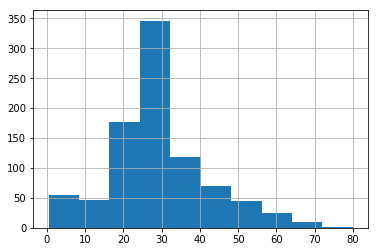

In [92]:
tit_train2['Age'].hist()

In [93]:
train_data = np.array(tit_train2)

In [94]:
features = train_data[0::,2::]

In [95]:
result = train_data[0::,1]

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import math
model = RandomForestClassifier(random_state= 42,n_jobs= -1)
parameter_dist = {'n_estimators': [20,100,200,300], 
  'min_samples_leaf': [5]
}  
classifier_RFR = GridSearchCV(model, parameter_dist)
results = classifier_RFR.fit(X, y)
classifier_RFR.best_score_
classifier_RFR.best_params_
classifier_RFR.scorer_

titanic_RFR = classifier_RFR.predict(test)
from sklearn.metrics import accuracy_score
accuracy_score(real['Survived'],titanic_RFR)

In [119]:
model = RandomForestClassifier(random_state= 42,n_jobs= -1)
parameter_dist = {'n_estimators':[20,100,200,300,1000], 'min_samples_leaf':[5]}
classifier_RFR = GridSearchCV(model, parameter_dist)
results = classifier_RFR.fit(features, result)
classifier_RFR.best_score_


0.80695847362514028

In [120]:
classifier_RFR.best_params_


{'min_samples_leaf': 5, 'n_estimators': 1000}

In [121]:
classifier_RFR.scorer_

<function sklearn.metrics.scorer._passthrough_scorer>

In [170]:
adaBoost = AdaBoostClassifier(ExtraTreesClassifier(n_estimators=200),
                         algorithm="SAMME.R",
                         n_estimators=200)

In [150]:
adaBoost = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=200)

In [171]:
adaBoost = adaBoost.fit(features,result)

In [172]:
scores = cross_val_score(adaBoost, features, result)

In [173]:
print(scores.mean())

0.784511784512


In [174]:
tit_test = pd.read_csv('test.csv', header = 0)

In [175]:
tit_test['female'] = np.where(tit_test['Sex']=='female', 1, 0)

In [176]:
match = tit_test['SibSp'] + tit_test['Parch']
tit_test['Alone?'] = np.where(match > 0, 0, 1)

In [177]:
tit_test['Emb'] = np.where(tit_test['Embarked'] == 'C' ,1, np.where(tit_test['Embarked'] == 'Q',2, np.where(tit_test['Embarked'] == 'S', 3, 3))) 

In [178]:
tit_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'Alone?', 'Emb'],
      dtype='object')

In [179]:
tit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
female         418 non-null int64
Alone?         418 non-null int64
Emb            418 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


In [180]:
tit_test2 = tit_test.drop(['Name', 'Sex','SibSp','Parch', 'Ticket','Cabin', 'Embarked'], axis=1)

In [181]:
imp=Imputer(missing_values="NaN", strategy="median" )
tit_test2["Age"]=imp.fit_transform(tit_test2[["Age"]]).ravel()

In [182]:
test_data = np.array(tit_test2)
features2 = test_data[0::,1::]

In [183]:
Output = adaBoost.predict(features)

In [184]:
np.savetxt("adaBoostET.csv",Output,delimiter=",",fmt="%s")